In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, log_loss, silhouette_score, mean_squared_error
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.svm import SVC, SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaseEnsemble, VotingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.cluster.hierarchy import linkage, dendrogram
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import AgglomerativeClustering, KMeans
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from pmdarima import arima, auto_arima
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

(20,)

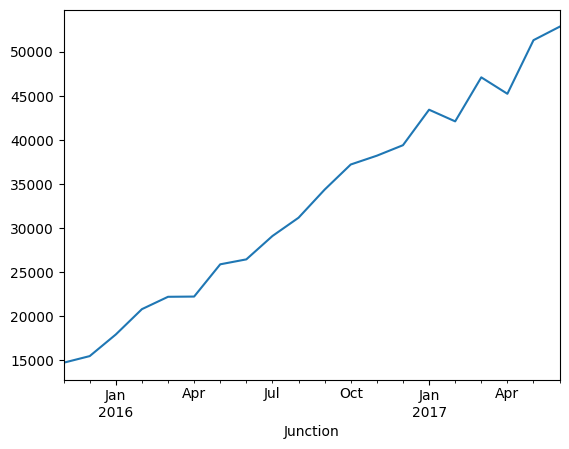

In [68]:
train = pd.read_csv(r"train_ML_IOT.csv", parse_dates= ['DateTime'])

train.set_index('DateTime', inplace = True)

vehicle = train[train['Junction'] == 1]['Vehicles']
mon_jun = vehicle.resample('M').sum()
mon_jun.index.rename('Junction', inplace=True)
mon_jun.plot()
mon_jun.shape

In [69]:
y_train = mon_jun[:-4]
y_test = mon_jun[-4:]

#### ARIMA

In [70]:
model = auto_arima(y_train, trace=True,
                   error_action='ignore', 
                   suppress_warnings=True)

forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=264.457, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=263.679, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=263.623, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=277.004, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=266.213, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=264.707, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=277.778, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.161 seconds


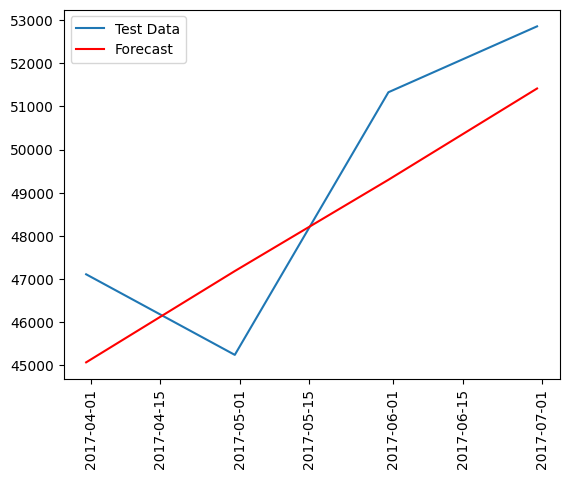

In [71]:
# plot results
plt.plot(y_test, label='Test Data')
plt.plot(forecast, color='red', label="Forecast")
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.show()

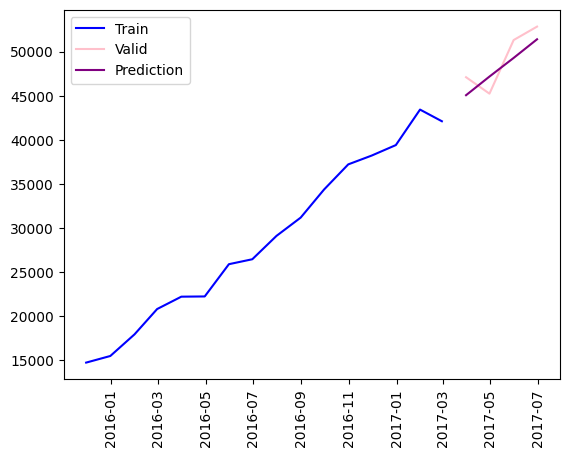

In [72]:
#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.show()

In [79]:
rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

Test RMSE: 1877.837


#### SARIMA

In [89]:

model = auto_arima(y_train, trace=True, 
                   error_action='ignore', 
                   suppress_warnings=True,
                   seasonal=True, m=4) # when we add seasonal=True and m, its SARIMA

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[4] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(0,0,0)(0,1,0)[4] intercept   : AIC=214.487, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(0,0,1)(0,1,1)[4] intercept   : AIC=212.655, Time=0.37 sec
 ARIMA(0,0,0)(0,1,0)[4]             : AIC=251.791, Time=0.02 sec
 ARIMA(0,0,1)(0,1,0)[4] intercept   : AIC=216.582, Time=0.03 sec
 ARIMA(0,0,1)(1,1,1)[4] intercept   : AIC=214.905, Time=0.45 sec
 ARIMA(0,0,1)(0,1,2)[4] intercept   : AIC=212.918, Time=0.33 sec
 ARIMA(0,0,1)(1,1,0)[4] intercept   : AIC=217.644, Time=0.34 sec
 ARIMA(0,0,1)(1,1,2)[4] intercept   : AIC=214.746, Time=0.60 sec
 ARIMA(0,0,0)(0,1,1)[4] intercept   : AIC=210.820, Time=0.18 sec
 ARIMA(0,0,0)(1,1,1)[4] intercept   : AIC=214.452, Time=0.12 sec
 ARIMA(0,0,0)(0,1,2)[4] intercept   : AIC=213.230, Time=0.09 sec
 ARIMA(0,0,0)(1,1,0)[4] intercept   : AIC=215.932, Time=0.19 sec
 ARIMA(0,0,0)(1,1,2)[4] intercept   : AIC=215.217, Time

In [90]:
forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

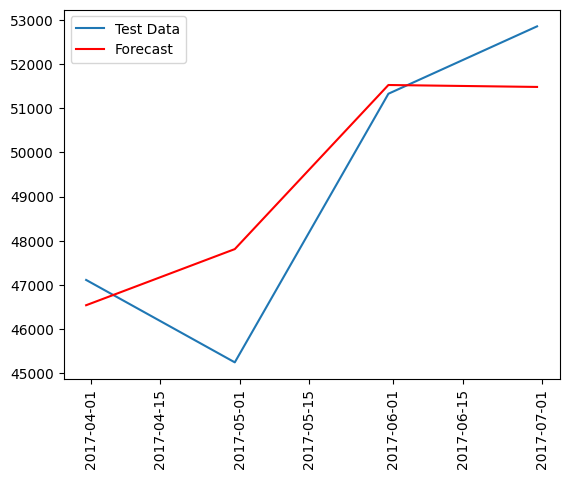

In [91]:
# plot results
plt.plot(y_test, label='Test Data')
plt.plot(forecast, color='red', label="Forecast")
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.show()

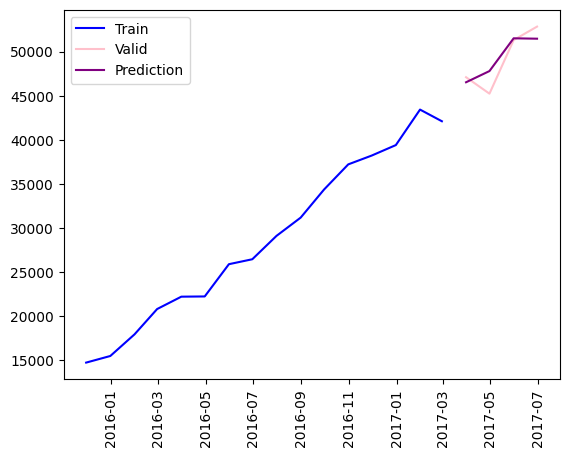

In [92]:
#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.show()

In [93]:
rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

Test RMSE: 1485.348


In [96]:
from statsmodels.tsa.api import ExponentialSmoothing
def solve(alpha, beta, gamma):
    ans = dict()

    for a in np.arange(0, alpha, 0.1):
        for b in np.arange(0, beta, 0.1):
            for g in np.arange(0, gamma, 0.1):
                holt_add = ExponentialSmoothing(y_train, seasonal_periods=4,
                                trend='add', seasonal='mul',
                                                damped_trend=True)
                fit1 = holt_add.fit(smoothing_level = a, smoothing_trend = b,
                                    smoothing_seasonal = g)

                fcast1 = fit1.forecast(len(y_test))
                res = sqrt(mean_squared_error(y_test, fcast1))
                print(res)
                ans.setdefault( res, f'{a}_{b}_{g}')
    return ans
            



In [99]:
sol = solve(1,1,1)
print(min(sol.keys()))
print(sol[min(sol.keys())])

996.9556431064224
1716.2180861186532
2620.4901258622017
3142.6549341765835
3342.5216670077734
3308.1301973876807
3117.1731793225995
2831.4893689369637
2496.814624921538
2144.626010173526
4226.955524942809
1716.218086118635
2620.490125862184
3142.6549341765676
3342.521667007758
3308.130197387662
3117.1731793225863
2831.4893689369446
2496.814624921521
2144.6260101735097
996.9556431064249
1716.2180861186412
2620.490125862184
3142.654934176571
3342.5216670077534
3308.1301973876575
3117.173179322582
2831.489368936949
2496.8146249215183
2144.626010173507
996.9556431064249
1716.2180861186412
4512.492607517665
3142.654934176571
3342.5216670077534
3308.1301973876575
3117.173179322582
2831.489368936949
2496.8146249215183
2144.626010173507
996.9556431064237
1716.2180861186287
2620.490125862176
3142.6549341765617
3342.5216670077402
3308.1301973876484
1251.627297241662
1134.512295455249
2496.8146249215056
2144.626010173499
996.9556431064237
1716.2180861186287
2620.490125862176
3142.6549341765617
33

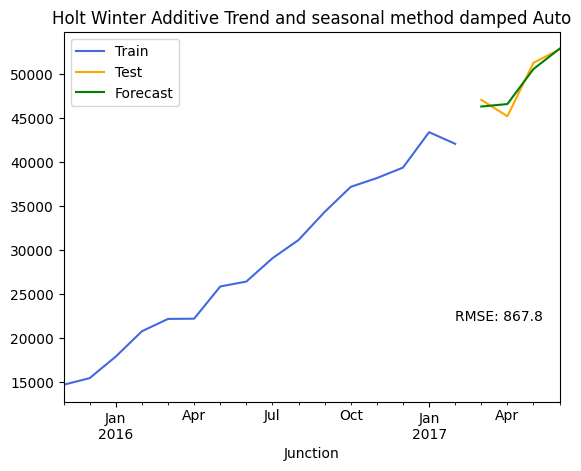

{'smoothing_level': 0.2, 'smoothing_trend': 0.7000000000000001, 'smoothing_seasonal': 0.2, 'damping_trend': 0.99, 'initial_level': 15668.933333333323, 'initial_trend': 2001.803030303032, 'initial_seasons': array([1.00338328, 0.97124953, 1.00944295, 1.01592425]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
867.8045414241329


In [113]:
holt_add = ExponentialSmoothing(y_train, seasonal_periods=4,
                                trend='add', seasonal='mul',
                                damped_trend=True)
fit1 = holt_add.fit(smoothing_level = 0.2, smoothing_trend = 0.7000000000000001,
                    smoothing_seasonal = 0.2)

fcast1 = fit1.forecast(len(y_test))

y_train.plot(color= 'royalblue', label = 'Train')
y_test.plot(color= 'orange', label = 'Test')
fcast1.plot(color= 'green', label = 'Forecast')

error = round(sqrt(mean_squared_error(y_test, fcast1)),2)
plt.text(y=22000, x= 565,s='RMSE: '+str(error))
plt.title('Holt Winter Additive Trend and seasonal method damped Auto')
plt.legend(loc = 'best')
plt.show()

print(fit1.params)
res = sqrt(mean_squared_error(y_test, fcast1))
print(res)